In [ ]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

sns.set(style='dark', context='notebook', palette='deep')
pd.options.display.max_columns = 100


In [ ]:
import pandas as pd

# Step 1: Read the Excel file into a DataFrame
training_csv = 'Copy_of_Days_in_Default.xlsx'
df = pd.read_excel(training_csv)
#Step 2: Read the Csv file into a Dataframe
training_csv2 = 'Onfon.csv'
df1 = pd.read_csv(training_csv2)


In [ ]:
# df

In [ ]:
# Convert the 'Msisdn' column to strings
df['Msisdn'] = df['Msisdn'].astype(str)

# Replace '254' with '0' and store it as a string
df['Msisdn'] = df['Msisdn'].str.replace('^254', '0')

In [ ]:
# df

In [ ]:
df.shape

(54194, 2)

In [ ]:
# df.info()

In [ ]:
# Convert the 'Msisdn' column in df to a string data type
df['Msisdn'] = df['Msisdn'].astype(str)


In [ ]:
# df.info()

In [ ]:
df1['MSISDN'] = df1['MSISDN'].astype(str).apply(lambda x: x.zfill(10))


In [ ]:
df1

,MSISDN,DateOfBirth,Gender,DATA_EXTRACTION_DATE,PAYMENT_TYPE,RECHARGE_MODE,SUBSCRIPTION_PERIOD,TRANSACTION_PERIOD,COUNT_OF_BLOCKS,TRANSACTION_RECIEVERS,LIMIT,TOPUP_CONSUMPTION,TOPUP_CONSUMPTION_6,ACTIVE_STATUS,TRANSACTIONS_RECIEVED,ACCOUNT_DEBIT,ACCOUNT_CREDIT,PAYMENT_TRXN,NUMBER_OF_PAYMENT_TRXN,VALUE_SENT,HIGHEST_VALUE,VALUE_RECIEVED,TRXN_COUNT,TOTAL_RECIEPTS_VALUE,PAYMENT_VALUE_2,PAYMENT_COUNT_2,BANK_TRANS,OTHER_RECEIPTS,TOTAL_BANK_TRANS,TOTAL_PAYMENTS,TOTAL_MONEY_IN_3,TOTAL_MONEY_OUT_3,CURR_POINTS,RDM_POINTS_6,LOAN_COUNT,LOAN_BLACKLIST,COUNT_OF_OVERDUE_LOANS,LOAN_BLACKLIST_DAYS,CURR_DEVICE_MAKE,CURR_DEVICE_RRP
0,0729033822,12/31/1963,M,8/25/2023,Pre Paid,Voucher recharge through USSD from self phone,10,10,0,1,0,4,5,0,7,1,7,0,0,3,4,7,5,NaN,0,0,0,0,1,6,1,3,3,3,6,1,4,4,0,0
1,0710919310,7/5/1991,M,8/25/2023,Pre Paid,MOBILE MONEY,6,7,0,8,0,7,9,0,10,10,10,8,7,9,8,9,8,NaN,7,1,6,0,10,10,8,8,8,0,1,0,0,0,0,0
2,0759977784,8/6/2003,M,8/25/2023,Pre Paid,Voucher recharge through USSD from self phone,3,4,0,1,0,3,2,0,2,0,2,0,0,1,1,2,3,NaN,0,0,0,0,0,2,0,2,0,0,0,1,0,0,0,0
3,0701491826,3/10/2000,M,6/9/2023,Pre Paid,Voucher recharge through USSD from self phone,4,5,0,7,0,4,4,0,7,5,7,0,9,8,6,6,6,NaN,0,0,0,0,8,8,8,8,0,0,0,0,0,0,0,0
4,0712558538,8/18/1999,F,8/25/2023,Pre Paid,Voucher recharge through USSD from self phone,4,5,0,0,0,2,3,5,1,0,0,0,0,0,0,1,1,NaN,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59520,0115821322,1/3/1976,M,8/20/2023,Pre Paid,Voucher recharge through USSD from self phone,1,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59521,0000000000,0,M,0,Pre Paid,MOBILE MONEY 3rd. Party Topup,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59522,0799909137,3/3/1999,M,8/20/2023,Pre Paid,MOBILE MONEY,2,3,0,7,0,4,3,5,7,3,7,0,3,7,7,8,7,NaN,0,0,0,0,7,7,8,7,0,5,0,1,0,0,0,0
59523,0790329797,6/20/1996,F,8/20/2023,Pre Paid,MOBILE MONEY,3,4,0,3,0,0,6,7,2,5,3,0,0,4,4,2,4,NaN,0,0,0,0,5,4,0,0,0,4,1,1,1,1,0,0


In [ ]:
# merged_df


In [ ]:
import pandas as pd

# Check for common values
common_values = set(df['Msisdn']).intersection(df1['MSISDN'])

if len(common_values) == 0:
    print("No common values found in 'Msisdn' and 'MSISDN' columns.")
else:
    # Merge df and df1 on the 'Msisdn' and 'MSISDN' columns, respectively
    merged_df = df.merge(df1, left_on='Msisdn', right_on='MSISDN', how='inner')

    # Display the merged DataFrame
    # merged_df.head()


In [ ]:
# # Print the unique values in each column
# for column in merged_df.columns:
#     unique_values = merged_df[column].unique()
#     unique_count = len(unique_values)

#     print(f"Column: {column}")
#     print(f"Number of Unique Values: {unique_count}")
#     print(f"Unique Values:")
#     print(unique_values)
#     print("\n")


In [ ]:
# merged_df

In [ ]:
merged_df.rename(columns={'Days In Default': 'days_defaulted'}, inplace=True)


In [ ]:
# merged_df

In [ ]:
# Calculate the minimum value
min_value = merged_df['days_defaulted'].min()

# Calculate the maximum value
max_value = merged_df['days_defaulted'].max()

# Calculate the median
median_value = merged_df['days_defaulted'].median()

# Calculate the mode (returns a Series, so we take the first element)
mode_value = merged_df['days_defaulted'].mode().iloc[0]

# Calculate the mean
mean_value = merged_df['days_defaulted'].mean()

# Display the results
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Median Value: {median_value}")
print(f"Mode Value: {mode_value}")
print(f"Mean Value: {mean_value}")

Minimum Value: -159
Maximum Value: 362
Median Value: 0.0
Mode Value: 0
Mean Value: 13.08750896608259


In [ ]:

# Define the ranges
# Define the ranges with intervals of 3
ranges = [(-float('inf'), 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17),
          (18, 20), (21, 23), (24, 26), (27, 29), (30, float('inf'))]


# Use pd.cut() to categorize 'days_defaulted' into the specified ranges
merged_df['range'] = pd.cut(merged_df['days_defaulted'], bins=[start-1 for start, _ in ranges] + [float('inf')], labels=[f'{start}-{end}' for start, end in ranges])

# Calculate the count of 'Msisdn' for each range
range_counts = merged_df['range'].value_counts().sort_index()

# Display the count of 'Msisdn' for each range
# print(range_counts)

In [ ]:
# Define the ranges with intervals of 3
ranges = [(-float('inf'), 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17),
          (18, 20), (21, 23), (24, 26), (27, 29), (30, float('inf'))]

# Use pd.cut() to categorize 'days_defaulted' into the specified ranges
merged_df['range'] = pd.cut(merged_df['days_defaulted'], bins=[start-1 for start, _ in ranges] + [float('inf')], labels=[f'{start}-{end}' for start, end in ranges])

# Calculate the count of 'Msisdn' for each range
range_counts = merged_df['range'].value_counts().sort_index()

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.bar(range_counts.index, range_counts.values, width=0.8, align='center', alpha=0.7)
# plt.xlabel('Ranges')
# plt.ylabel('Frequency')
# plt.title('Histogram of Ranges vs. Frequency')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


In [ ]:
# 6756/9797*100

In [ ]:
# Create a new column based on the condition
merged_df['Target'] = np.where(merged_df['days_defaulted'] <= 15, 0, 1)


In [ ]:
# merged_df

In [ ]:
merged_df.shape

(9759, 44)

In [ ]:
# merged_df.info()

In [ ]:
# merged_df.isnull().sum()

In [ ]:
# Convert the 'DateOfBirth' column to datetime
merged_df['DateOfBirth'] = pd.to_datetime(merged_df['DateOfBirth'])

# Calculate age by subtracting the 'DateOfBirth' from the current date
current_date = datetime.now()
merged_df['Age'] = (current_date - merged_df['DateOfBirth']).astype('<m8[Y]')


In [ ]:
# merged_df

In [ ]:
merged_df = merged_df.drop([ "days_defaulted", "MSISDN", "DateOfBirth", "DATA_EXTRACTION_DATE", "TOTAL_RECIEPTS_VALUE","range"], axis=1)


In [ ]:
# merged_df.info()

In [ ]:
# merged_df.isnull().sum()

**LET ME HANDLE MISSING VALUES IN age column NOW**

there are 3 missing values in age column,let me check which percentage of the data is it

In [ ]:
# 3/9759*100

WE can see it is a verry smaller portion of the data , therefore I will drop them

In [ ]:
merged_df.dropna(subset=['Age'], inplace=True)


In [ ]:
merged_df.isnull().sum()

Msisdn                      0
Gender                    231
PAYMENT_TYPE                0
RECHARGE_MODE               0
SUBSCRIPTION_PERIOD         0
TRANSACTION_PERIOD          0
COUNT_OF_BLOCKS             0
TRANSACTION_RECIEVERS       0
LIMIT                       0
TOPUP_CONSUMPTION           0
TOPUP_CONSUMPTION_6         0
ACTIVE_STATUS               0
TRANSACTIONS_RECIEVED       0
ACCOUNT_DEBIT               0
ACCOUNT_CREDIT              0
PAYMENT_TRXN                0
NUMBER_OF_PAYMENT_TRXN      0
VALUE_SENT                  0
HIGHEST_VALUE               0
VALUE_RECIEVED              0
TRXN_COUNT                  0
PAYMENT_VALUE_2             0
PAYMENT_COUNT_2             0
BANK_TRANS                  0
OTHER_RECEIPTS              0
TOTAL_BANK_TRANS            0
TOTAL_PAYMENTS              0
TOTAL_MONEY_IN_3            0
TOTAL_MONEY_OUT_3           0
CURR_POINTS                 0
RDM_POINTS_6                0
LOAN_COUNT                  0
LOAN_BLACKLIST              0
COUNT_OF_O

I will check how to handle missing values in Gender column later in the code after tackling some bivariate statistics

## BIVARIATE & MULTIVARIATE ANALYSIS

In [ ]:
## Let me change Age to a Categorical Varriable now

Now since we only have categorical varriables , we will not base the predictive ability of variables on correlation ,I will explore other means to to gauge the predictive abilities of your columns. Correlation is generally not the best measure for categorical-categorical relationships because it's designed for continuous variables and doesn't provide a complete picture of the associations in categorical data

## Let's Explore Chi-Square Test

## Let us check Relation betweeen columns and the Target

In [ ]:
# from scipy.stats import chi2_contingency

# # Create a list of columns (excluding the 'Target' column) for which you want to calculate p-values
# columns_to_test = ['Gender', 'PAYMENT_TYPE', 'RECHARGE_MODE', 'SUBSCRIPTION_PERIOD', 'TRANSACTION_PERIOD', 'COUNT_OF_BLOCKS', 'TRANSACTION_RECIEVERS', 'LIMIT', 'TOPUP_CONSUMPTION', 'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED', 'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'PAYMENT_TRXN', 'NUMBER_OF_PAYMENT_TRXN', 'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT', 'PAYMENT_VALUE_2', 'PAYMENT_COUNT_2', 'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS', 'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6', 'LOAN_COUNT', 'LOAN_BLACKLIST', 'COUNT_OF_OVERDUE_LOANS', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE', 'CURR_DEVICE_RRP']

# # Iterate over the columns and calculate p-values
# for column in columns_to_test:
#     contingency_table = pd.crosstab(merged_df[column], merged_df['Target'])
#     chi2, p, _, _ = chi2_contingency(contingency_table)
#     print(f"Chi-squared Statistic for {column}: {chi2}")
#     print(f"P-Value for {column}: {p}")

#     # Interpret the results
#     if p < 0.05:
#         print(f"There is a statistically significant association between {column} and Target.")
#     else:
#         print(f"There is no statistically significant association between {column} and Target.")
#     print("\n")


## MULTIVARIATE ANALYSIS

## will calculate p-values for associations between all pairs of columns and store them in a DataFrame. You can ## we then inspect the p-values to identify columns that seem to be related based on statistical significance.

In [ ]:
# from itertools import combinations
# from scipy.stats import chi2_contingency

# # Create a list of independent variable columns (exclude 'Target' if necessary)
# independent_columns = ['Gender', 'PAYMENT_TYPE', 'RECHARGE_MODE', 'SUBSCRIPTION_PERIOD', 'TRANSACTION_PERIOD', 'COUNT_OF_BLOCKS', 'TRANSACTION_RECIEVERS', 'LIMIT', 'TOPUP_CONSUMPTION', 'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED', 'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'PAYMENT_TRXN', 'NUMBER_OF_PAYMENT_TRXN', 'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT', 'PAYMENT_VALUE_2', 'PAYMENT_COUNT_2', 'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS', 'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6', 'LOAN_COUNT', 'LOAN_BLACKLIST', 'COUNT_OF_OVERDUE_LOANS', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE', 'CURR_DEVICE_RRP']

# # Create a dictionary to store chi-square results
# chi_square_results = {}

# # Iterate over all combinations of independent variables
# for combo in combinations(independent_columns, 2):
#     var1, var2 = combo

#     contingency_table = pd.crosstab(merged_df[var1], merged_df[var2])
#     chi2, p, _, _ = chi2_contingency(contingency_table)

#     chi_square_results[f"{var1} vs. {var2}"] = {
#         "Chi-squared Statistic": chi2,
#         "P-Value": p
#     }

#     print(f"Chi-squared Statistic for {var1} vs. {var2}: {chi2}")
#     print(f"P-Value for {var1} vs. {var2}: {p}")

#     # Interpret the results
#     if p < 0.05:
#         print(f"There is a statistically significant association between {var1} and {var2}.")
#     else:
#         print(f"There is no statistically significant association between {var1} and {var2}.")
#     print("\n")

# # You can access the results in chi_square_results dictionary for further analysis


## We can now explore Cramér's V

Cramér's V: Cramér's V is a measure of association between two categorical variables. It ranges from 0 to 1, with higher values indicating a stronger association. It's an extension of the chi-square test statistic.

In [ ]:
# from scipy.stats import chi2_contingency

# # Create a list of columns (excluding the 'Target' column) for which you want to calculate Cramér's V
# columns_to_test = ['Gender', 'PAYMENT_TYPE', 'RECHARGE_MODE', 'SUBSCRIPTION_PERIOD', 'TRANSACTION_PERIOD', 'COUNT_OF_BLOCKS', 'TRANSACTION_RECIEVERS', 'LIMIT', 'TOPUP_CONSUMPTION', 'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED', 'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'PAYMENT_TRXN', 'NUMBER_OF_PAYMENT_TRXN', 'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT', 'PAYMENT_VALUE_2', 'PAYMENT_COUNT_2', 'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS', 'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6', 'LOAN_COUNT', 'LOAN_BLACKLIST', 'COUNT_OF_OVERDUE_LOANS', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE', 'CURR_DEVICE_RRP']

# # Function to calculate Cramér's V
# def cramers_v(confusion_matrix):
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
#     rcorr = r - ((r - 1)**2) / (n - 1)
#     kcorr = k - ((k - 1)**2) / (n - 1)
#     return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# # Iterate over the columns and calculate Cramér's V
# for column in columns_to_test:
#     confusion_matrix = pd.crosstab(merged_df[column], merged_df['Target'])
#     cramers_v_value = cramers_v(confusion_matrix.values)
#     print(f"Cramér's V for {column}: {cramers_v_value}")

#     # Interpret the results
#     if cramers_v_value >= 0.1:
#         print(f"There is a moderate to strong association between {column} and Target.")
#     else:
#         print(f"There is no or a weak association between {column} and Target.")
#     print("\n")


**Let me explore this on Crammers-V**

In [ ]:
# from itertools import combinations
# import numpy as np
# import pandas as pd
# from scipy.stats import chi2_contingency

# # Create a list of independent variable columns (exclude 'Target' if necessary)
# independent_columns = ['Gender', 'PAYMENT_TYPE', 'RECHARGE_MODE', 'SUBSCRIPTION_PERIOD', 'TRANSACTION_PERIOD', 'COUNT_OF_BLOCKS', 'TRANSACTION_RECIEVERS', 'LIMIT', 'TOPUP_CONSUMPTION', 'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED', 'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'PAYMENT_TRXN', 'NUMBER_OF_PAYMENT_TRXN', 'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT', 'PAYMENT_VALUE_2', 'PAYMENT_COUNT_2', 'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS', 'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6', 'LOAN_COUNT', 'LOAN_BLACKLIST', 'COUNT_OF_OVERDUE_LOANS', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE', 'CURR_DEVICE_RRP']

# # Create a dictionary to store Cramer's V results
# cramers_v_results = {}

# # Iterate over all combinations of independent variables
# for combo in combinations(independent_columns, 2):
#     var1, var2 = combo

#     contingency_table = pd.crosstab(merged_df[var1], merged_df[var2])
#     chi2, _, _, _ = chi2_contingency(contingency_table)

#     n = contingency_table.sum().sum()
#     phi2 = chi2 / n
#     r, k = contingency_table.shape
#     phi2_corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
#     r_corr = r - ((r-1)**2) / (n-1)
#     k_corr = k - ((k-1)**2) / (n-1)

#     cramers_v = np.sqrt(phi2_corr / (min((k_corr-1), (r_corr-1))))

#     cramers_v_results[f"{var1} vs. {var2}"] = cramers_v

#     print(f"Cramer's V for {var1} vs. {var2}: {cramers_v}")

#     # Interpret the results
#     if cramers_v > 0.1:
#         print(f"There is a moderate association between {var1} and {var2}.")
#     else:
#         print(f"There is no substantial association between {var1} and {var2}.")
#     print("\n")

# # You can access the results in cramers_v_results dictionary for further analysis


**I will drop the COUNT_OF_OVERDUE_LOANS, and retain LOAN_BLACKLIST, because LOAN_BLACKLIST has lower P value and higher Crammers V in relation to the Target**

**I will drop the SUBSCRIPTION_PERIOD, and retain LOAN_BLACKLIST, because LOAN_BLACKLIST has lower P value and higher Crammers V in relation to the Target**

## BIVARIATE ANALYSIS

## LET ME EXPLORE GENDER

In [ ]:
# # Explore Gender vs Target
# g = sns.catplot(x="Gender", y="Target", data=merged_df, kind="bar", height=6, palette="muted")
# g.despine(left=True)
# g.set_ylabels("Target probability")


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Replace missing values (NaN) in 'Gender' column with 'Missing' for visualization
# merged_df['Gender'].fillna('Missing', inplace=True)

# # Create a bar plot to show the distribution of 'Gender' by 'Target' values
# plt.figure(figsize=(12, 6))
# sns.countplot(data=merged_df, x='Gender', hue='Target', palette={0: 'blue', 1: 'green', 'Missing': 'red'})
# plt.title('Distribution of Gender by Target')
# plt.xlabel('Gender')
# plt.ylabel('Count')

# plt.tight_layout()
# plt.show()


**To check Percentage**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Replace missing values (NaN) in 'Gender' column with 'Missing' for visualization
# merged_df['Gender'].fillna('Missing', inplace=True)

# # Calculate the percentage of 'Gender' by 'Target' values
# percentage_df = (merged_df.groupby(['Gender', 'Target']).size() / len(merged_df)).reset_index(name='Percentage')

# # Create a bar plot to show the distribution of 'Gender' by 'Target' values
# plt.figure(figsize=(12, 6))
# sns.barplot(data=percentage_df, x='Gender', y='Percentage', hue='Target', palette={0: 'blue', 1: 'green', 'Missing': 'red'})
# plt.title('Distribution of Gender by Target')
# plt.xlabel('Gender')
# plt.ylabel('Percentage of Count')

# # Print the percentages for each class and each 'Target' value
# for index, row in percentage_df.iterrows():
#     gender = row['Gender']
#     target = row['Target']
#     percentage = row['Percentage']
#     print(f"Gender: {gender}, Target: {target}, Percentage: {percentage:.2%}")

# plt.tight_layout()
# plt.show()


**WE can see from the above that both Default and non default is dominated by Male**

**Let us now fill missing values in the Gender Column now using the mode basing the proportion of * *

In [ ]:
# import pandas as pd
# import numpy as np

# # Convert the 'Gender' column to string data type before imputation
# merged_df['Gender'] = merged_df['Gender'].astype(str)

# # Calculate the overall proportions of 'M' and 'F' in the existing data
# gender_proportions = merged_df['Gender'].value_counts(normalize=True)

# # Function to impute missing values based on overall proportions
# def impute_gender(row):
#     if row['Gender'] == 'Gender_Missing':
#         # Randomly impute "M" or "F" based on the overall proportions
#         imputed_gender = np.random.choice(gender_proportions.index, p=gender_proportions.values)
#         return imputed_gender
#     else:
#         return row['Gender']

# # Apply the function to impute missing values
# merged_df['Gender'] = merged_df.apply(impute_gender, axis=1)

# # Check if there are still missing values
# missing_values_count = (merged_df['Gender'] == 'Gender_Missing').sum()
# print(f"Missing values in 'Gender' column after imputation: {missing_values_count}")


In [ ]:
# import pandas as pd
# import numpy as np

# # Calculate proportions of 'M' and 'F' based on 'Target' values
# proportions_by_target = merged_df.groupby(['Target', 'Gender']).size().unstack(fill_value=0)
# proportions_by_target = proportions_by_target.div(proportions_by_target.sum(axis=1), axis=0)

# # Function to impute missing values based on 'Target' and proportions
# def impute_gender(row):
#     if pd.isna(row['Gender']):
#         target_value = row['Target']
#         imputed_gender = np.random.choice(proportions_by_target.loc[target_value].index, p=proportions_by_target.loc[target_value].values)
#         return imputed_gender
#     else:
#         return row['Gender']

# # Apply the function to impute missing values
# merged_df['Gender'] = merged_df.apply(impute_gender, axis=1)

# # Check if there are still missing values
# missing_values_count = merged_df['Gender'].isna().sum()
# print(f"Missing values in 'Gender' column after imputation: {missing_values_count}")


In [ ]:
merged_df.dropna(subset=['Gender'], inplace=True)


In [ ]:
# import pandas as pd
# import scipy.stats as stats

# # Define a list of columns to test
# columns_to_test = merged_df.columns.difference(['Age'])  # Exclude 'Age'

# # Create an empty dictionary to store the results
# anova_results = {}

# # Perform ANOVA for each column
# for column in columns_to_test:
#     unique_values = merged_df[column].unique()
#     if len(unique_values) > 1:  # Check if there are multiple groups in the column
#         try:
#             # Perform ANOVA
#             f_statistic, p_value = stats.f_oneway(*[merged_df['Age'][merged_df[column] == group_value] for group_value in unique_values])

#             # Store the results
#             anova_results[column] = {'F-statistic': f_statistic, 'p-value': p_value}
#         except KeyError:
#             print(f"Column '{column}' not found in the dataset.")

# # Function to interpret the p-value
# def interpret_p_value(p_value):
#     if p_value < 0.05:
#         return "Strong Relationship"
#     elif p_value < 0.1:
#         return "Moderate Relationship"
#     else:
#         return "Weak Relationship"

# # Print the results
# for column, results in anova_results.items():
#     p_value = results['p-value']
#     relationship_strength = interpret_p_value(p_value)
#     print(f"{column}: {relationship_strength} (p-value: {p_value:.4f})")


In [ ]:
# import pandas as pd
# import scipy.stats as stats

# # Define a list of columns to test
# columns_to_test = merged_df.columns.difference(['Age'])  # Exclude 'Age'

# # Create an empty dictionary to store the results
# kw_results = {}

# # Perform Kruskal-Wallis test for each column
# for column in columns_to_test:
#     unique_values = merged_df[column].unique()
#     if len(unique_values) > 1:  # Check if there are multiple groups in the column
#         try:
#             # Perform Kruskal-Wallis test
#             groups = [merged_df['Age'][merged_df[column] == group_value] for group_value in unique_values]
#             k_statistic, p_value = stats.kruskal(*groups)

#             # Store the results
#             kw_results[column] = {'Kruskal-Statistic': k_statistic, 'p-value': p_value}
#         except KeyError:
#             print(f"Column '{column}' not found in the dataset.")

# # Function to interpret the p-value
# def interpret_p_value(p_value):
#     if p_value < 0.05:
#         return "Strong Relationship"
#     elif p_value < 0.1:
#         return "Moderate Relationship"
#     else:
#         return "Weak Relationship"

# # Print the results
# for column, results in kw_results.items():
#     p_value = results['p-value']
#     relationship_strength = interpret_p_value(p_value)
#     print(f"{column}: {relationship_strength} (p-value: {p_value:.4f})")


In [ ]:
# import pandas as pd
# import scipy.stats as stats

# # Define a list of columns to test
# columns_to_test = merged_df.columns.difference(['Age'])  # Exclude 'Age'

# # Create an empty dictionary to store the results
# pbs_results = {}

# # Perform Point-Biserial Correlation for each column
# for column in columns_to_test:
#     try:
#         # Ensure 'Age' is treated as a continuous variable
#         age = merged_df['Age'].astype(float)

#         # Convert the categorical variable to a binary variable
#         binary_variable = (merged_df[column] == merged_df[column].mode()[0]).astype(int)

#         # Calculate Point-Biserial Correlation
#         pbs_corr, p_value = stats.pointbiserialr(binary_variable, age)

#         # Store the results
#         pbs_results[column] = {'Point-Biserial Correlation': pbs_corr, 'p-value': p_value}
#     except KeyError:
#         print(f"Column '{column}' not found in the dataset.")

# # Function to interpret the p-value and correlation strength
# def interpret_p_value(p_value):
#     if p_value < 0.05:
#         return "Strong Relationship"
#     elif p_value < 0.1:
#         return "Moderate Relationship"
#     else:
#         return "Weak Relationship"

# # Print the results
# for column, results in pbs_results.items():
#     p_value = results['p-value']
#     correlation_strength = interpret_p_value(p_value)
#     pbs_corr = results['Point-Biserial Correlation']
#     print(f"{column}: {correlation_strength}, Point-Biserial Correlation: {pbs_corr:.4f}, p-value: {p_value:.4f}")


## Let me explore Age

In [ ]:
# # Explore Age vs Survived
# g = sns.FacetGrid(merged_df, col='Target')
# g = g.map(sns.distplot, "Age")

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['Target'] == 0]['Age'], color='blue', kde=True)
# plt.title('Distribution of Age for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['Age'], color='green', kde=True)
# plt.title('Distribution of Age for Target = 1')

# plt.tight_layout()
# plt.show()


**Since I am able to see that most people lie between 30 to 50 range in years**

**From the above distant plots we are able to notice a notable pattern for the positive class which we are much interested in ,From the above plots we can seee and maybe passively conclude that people aged between 0 to 40 range  are more likely to default in  which is the vice vasa state considering persons aged between 40 to 100 years range , So in a nutshell , Age and default rate have inverse relationship

## Explore PAYMENT_TYPE

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['Target'] == 0]['PAYMENT_TYPE'], color='blue', kde=True)
# plt.title('Distribution of PAYMENT_TYPE for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['PAYMENT_TYPE'], color='green', kde=True)
# plt.title('Distribution of Gender for Target = 1')

# plt.tight_layout()
# plt.show()


**I can conclude that payment method is highly skewed to one side having a longer tail and therefore I will drop it because it can cause bias in my final result**

## Explore COUNT_OF_BLOCKS

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['Target'] == 0]['COUNT_OF_BLOCKS'], color='blue', kde=True)
# plt.title('Distribution of COUNT_OF_BLOCKS for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['COUNT_OF_BLOCKS'], color='green', kde=True)
# plt.title('Distribution of COUNT_OF_BLOCKS for Target = 1')

# plt.tight_layout()
# plt.show()


**I can conclude that COUNT_OF_BLOCKS  is highly skewed to one side having a longer tail and therefore I will drop it because it can cause bias in my final result**

## Explore TRANSACTION_RECIEVERS

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['Target'] == 0]['TRANSACTION_RECIEVERS'], color='blue', kde=True)
# plt.title('Distribution of TRANSACTION_RECIEVERS for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['TRANSACTION_RECIEVERS'], color='green', kde=True)
# plt.title('Distribution of TRANSACTION_RECIEVERS for Target = 1')

# plt.tight_layout()
# plt.show()


## Explore LIMIT

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['Target'] == 0]['LIMIT'], color='blue', kde=True)
# plt.title('Distribution of LIMIT for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['LIMIT'], color='green', kde=True)
# plt.title('Distribution of LIMIT for Target = 1')

# plt.tight_layout()
# plt.show()


## Explore PAYMENT_TRXN

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['PAYMENT_TRXN'] == 0]['PAYMENT_TRXN'], color='blue', kde=True)
# plt.title('Distribution of PAYMENT_TRXN for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['PAYMENT_TRXN'], color='green', kde=True)
# plt.title('Distribution of PAYMENT_TRXN for Target = 1')

# plt.tight_layout()
# plt.show()


## Explore PAYMENT_COUNT_2

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['PAYMENT_COUNT_2'] == 0]['PAYMENT_COUNT_2'], color='blue', kde=True)
# plt.title('Distribution of PAYMENT_COUNT_2 for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['PAYMENT_COUNT_2'], color='green', kde=True)
# plt.title('Distribution of PAYMENT_COUNT_2 for Target = 1')

# plt.tight_layout()
# plt.show()


## Explore LOAN_COUNT

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['LOAN_COUNT'] == 0]['LOAN_COUNT'], color='blue', kde=True)
# plt.title('Distribution of LOAN_COUNT for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['LOAN_COUNT'], color='green', kde=True)
# plt.title('Distribution of LOAN_COUNT for Target = 1')

# plt.tight_layout()
# plt.show()


In [ ]:
## Explore PAYMENT_VALUE_2

In [ ]:
# # Filter the DataFrame for Target = 0 and create a distplot
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.histplot(merged_df[merged_df['PAYMENT_VALUE_2'] == 0]['PAYMENT_VALUE_2'], color='blue', kde=True)
# plt.title('Distribution of PAYMENT_VALUE_2 for Target = 0')

# # Filter the DataFrame for Target = 1 and create a distplot
# plt.subplot(1, 2, 2)
# sns.histplot(merged_df[merged_df['Target'] == 1]['PAYMENT_VALUE_2'], color='green', kde=True)
# plt.title('Distribution of PAYMENT_VALUE_2 for Target = 1')

# plt.tight_layout()
# plt.show()


We can see that te above columns have resembling charts when plotted in relation to the target and from the chi square tests too have same characteristics and non signifficant so I will drop them

**Let me drop some more columns beacause they are too lesser  signifficant to my Target**

In [ ]:
# dropping the columns
merged_df.drop(['PAYMENT_TYPE','COUNT_OF_BLOCKS','TRANSACTION_RECIEVERS','LIMIT','PAYMENT_TRXN','PAYMENT_COUNT_2','LOAN_COUNT','PAYMENT_VALUE_2','COUNT_OF_OVERDUE_LOANS','RECHARGE_MODE'], axis=1, inplace=True)

In [ ]:
# merged_df.info()

Now we are set to go because our data has no missing values anymore

In [ ]:
# Define a list of columns to be converted to string
columns_to_convert = [col for col in merged_df.columns if col not in [ 'Age','Gender', 'Target']]

# Change the data type of selected columns to string
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(str)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9525 entries, 0 to 9758
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Msisdn                  9525 non-null   object 
 1   Gender                  9525 non-null   object 
 2   SUBSCRIPTION_PERIOD     9525 non-null   object 
 3   TRANSACTION_PERIOD      9525 non-null   object 
 4   TOPUP_CONSUMPTION       9525 non-null   object 
 5   TOPUP_CONSUMPTION_6     9525 non-null   object 
 6   ACTIVE_STATUS           9525 non-null   object 
 7   TRANSACTIONS_RECIEVED   9525 non-null   object 
 8   ACCOUNT_DEBIT           9525 non-null   object 
 9   ACCOUNT_CREDIT          9525 non-null   object 
 10  NUMBER_OF_PAYMENT_TRXN  9525 non-null   object 
 11  VALUE_SENT              9525 non-null   object 
 12  HIGHEST_VALUE           9525 non-null   object 
 13  VALUE_RECIEVED          9525 non-null   object 
 14  TRXN_COUNT              9525 non-null   

## Detecting outliers

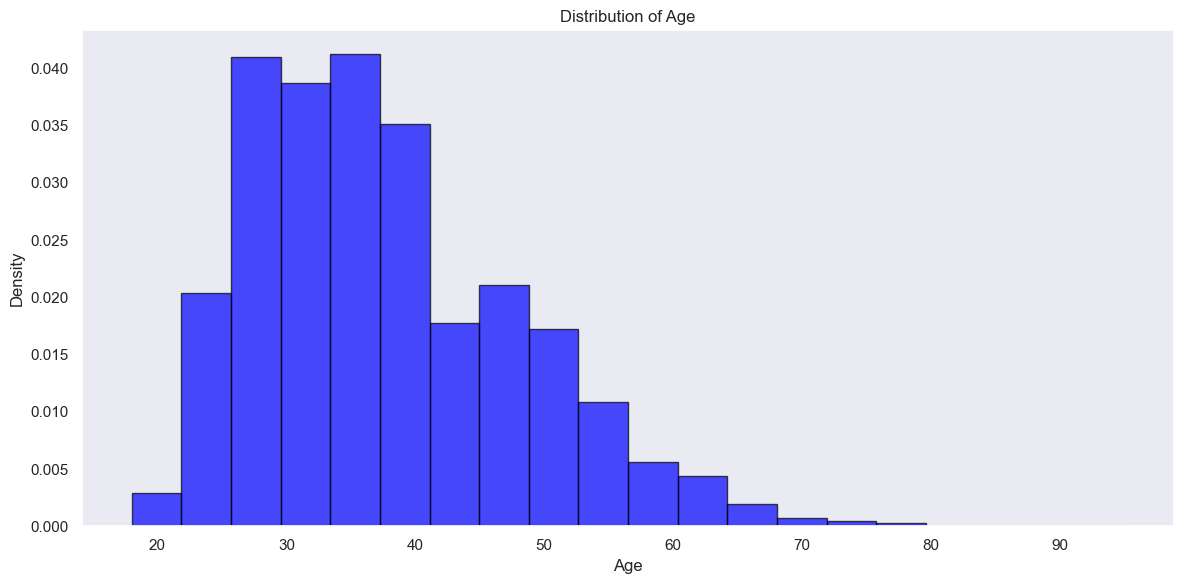

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Age' is the column you want to visualize
age_data = merged_df['Age']

# Create a histogram plot to show the distribution of 'Age'
plt.figure(figsize=(12, 6))
plt.hist(age_data, bins=20, color='blue', alpha=0.7, edgecolor='black', density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()


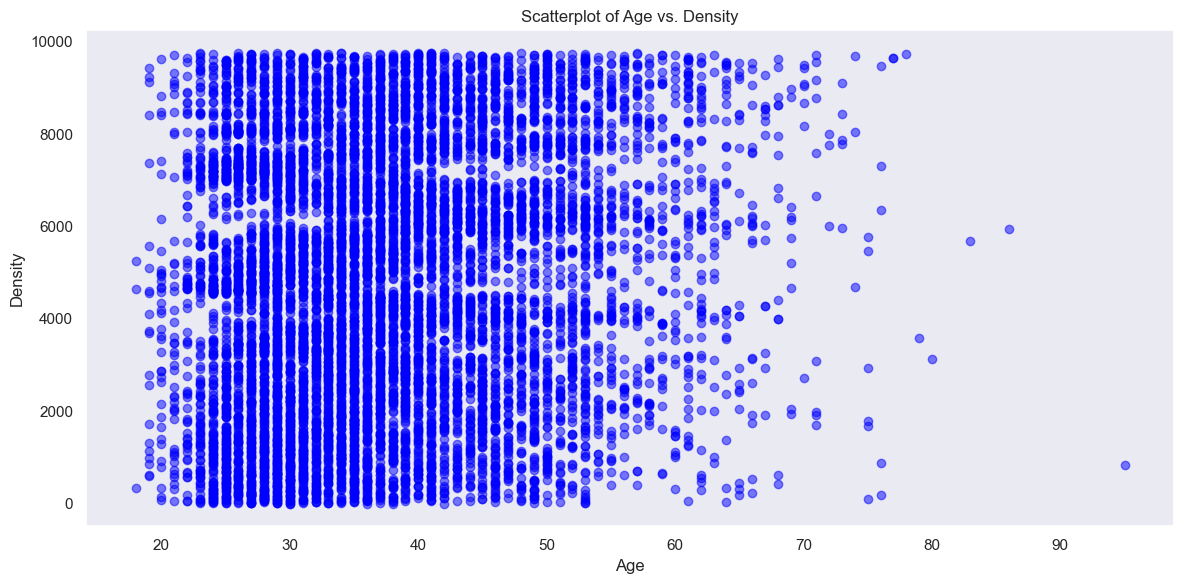

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Age' is the column you want to visualize
age_data = merged_df['Age']

# Create a scatterplot to visualize the distribution of 'Age'
plt.figure(figsize=(12, 6))
plt.scatter(age_data, age_data.index, alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Scatterplot of Age vs. Density')

plt.tight_layout()
plt.show()


from the above we can see that we have some customers who are above the age of 80

In [ ]:
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outliers = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.90)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            column_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers.append((col, len(column_outliers)))
    return outliers

# Detect outliers in the entire DataFrame merged_df
outliers = detect_outliers(merged_df)

# Print the columns with the count of outliers
for col, count in outliers:
    print(f"Column '{col}' has {count} outliers.")

# You can choose a threshold for the count of outliers to identify columns with significant outliers
# For example, if you want to consider columns with more than 10 outliers as problematic:
problematic_columns = [col for col, count in outliers if count > 10]
print("Problematic columns with significant outliers:", problematic_columns)


Column 'Target' has 0 outliers.
Column 'Age' has 2 outliers.
Problematic columns with significant outliers: []


**I set  my  threshhold for the outlier detection to be 0.25 to 0.90 because from my analysis and scatterplot, some people aged more than 70 years are buying phones and making payments. Depending on the context of your analysis, these data points may not be outliers but rather legitimate observations. Therefore, it's essential to consider**

In [ ]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_no_outliers

# Specify the column you want to check for outliers (e.g., 'Age')
column_to_check = 'Age'

# Remove outliers from the DataFrame
merged_df_no_outliers = remove_outliers(merged_df, column_to_check)

# merged_df_no_outliers now contains the data with outliers removed


**therefore, I will drop the one outlier because it comprises a lesser portion of my dataset**

In [ ]:
merged_df=merged_df_no_outliers

In [ ]:
# merged_df.Age = pd.qcut(merged_df.Age.values, 20).codes

In [4]:
# merged_df

In [ ]:
# Assuming 'Msisdn' is the column you want to set as the index in the DataFrame 'merged_df'
merged_df.set_index('Msisdn', inplace=True)


In [5]:
# merged_df

SINCE WE HAVE CONFIRMED OUR DATASET HAS NO MISSING VALUES AND OUTLIERS WE CAN NOW EXPLORE OUR TARGET VARRIABLE

## TARGET DISTRIBUTION

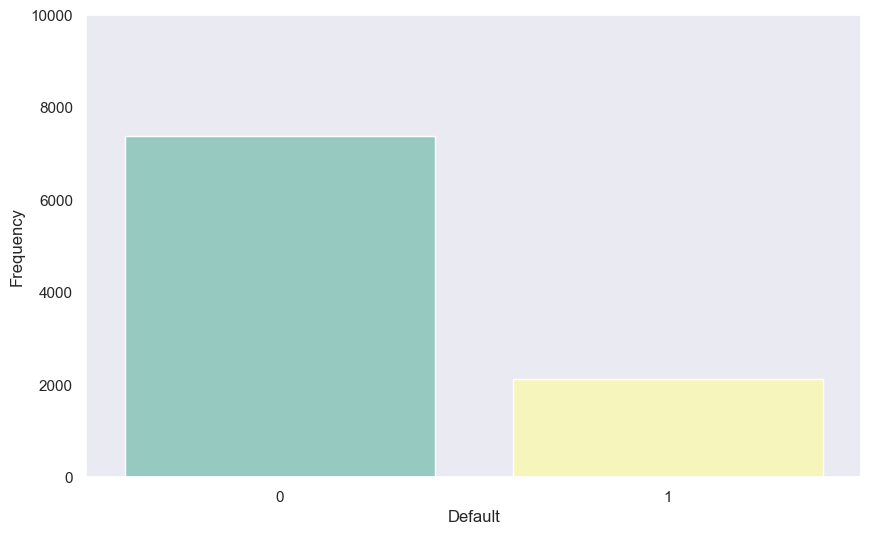

In [ ]:
ax = sns.countplot(x = merged_df.Target ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 10000)
ax.set_xlabel('Default')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,6)
ax.set_ylim(top=10000)
plt.show()

## Let's Explore some of our Variables

## Let's Explore Age Now

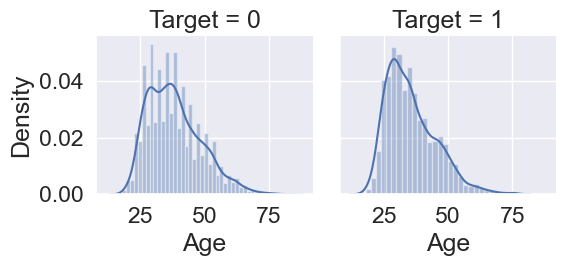

In [ ]:
# Explore Age vs Target
g = sns.FacetGrid(merged_df, col='Target')
g = g.map(sns.distplot, "Age")

**From the above distant plots we are able to notice a notable pattern for the positive class which we are much interested in ,From the above plots we can seee and maybe passively conclude that people aged between 0 to 50 range  are likely to default in  which is the vice vasa state considering persons aged between 50 to 100 years range , So in a nutshell , Age and default rate have inverse relationship

we can see also an inverse relationshop between the count of overdue loans and the target varriable

## Let's Explore NUMBER_OF_PAYMENT_TRXN

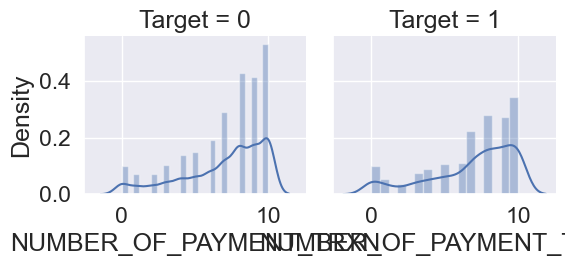

In [ ]:
# Explore COUNT_OF_OVERDUE_LOANS vs Target with wider spacing
g = sns.FacetGrid(merged_df, col='Target', col_wrap=2)  # Set col_wrap to control the number of columns
g = g.map(sns.distplot, "NUMBER_OF_PAYMENT_TRXN")

# Show the plot
plt.show()


## Explore ACCOUNT_DEBIT

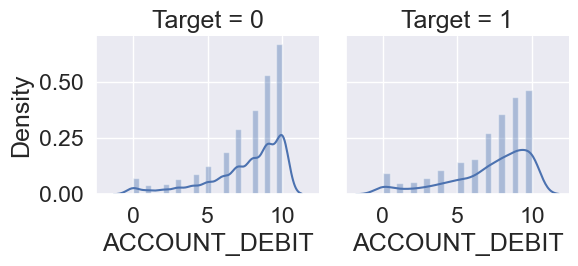

In [ ]:
# Explore ACCOUNT_DEBIT vs Target with wider spacing
g = sns.FacetGrid(merged_df, col='Target', col_wrap=2)  # Set col_wrap to control the number of columns
g = g.map(sns.distplot, "ACCOUNT_DEBIT")

# Show the plot
plt.show()


## Explore ACCOUNT_CREDIT

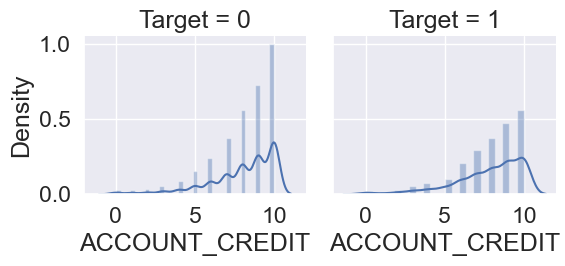

In [ ]:
# Explore ACCOUNT_CREDIT vs Target with wider spacing
g = sns.FacetGrid(merged_df, col='Target', col_wrap=2)  # Set col_wrap to control the number of columns
g = g.map(sns.distplot, "ACCOUNT_CREDIT")

# Show the plot
plt.show()


## Explore SUBSCRIPTION_PERIOD

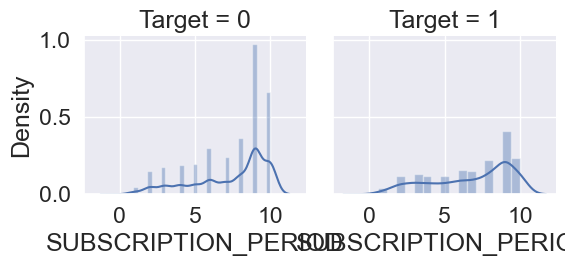

In [ ]:
# Explore SUBSCRIPTION_PERIOD vs Target with wider spacing
g = sns.FacetGrid(merged_df, col='Target', col_wrap=2)  # Set col_wrap to control the number of columns
g = g.map(sns.distplot, "SUBSCRIPTION_PERIOD")

# Show the plot
plt.show()


In [ ]:
## Explore TOTAL_BANK_TRANS

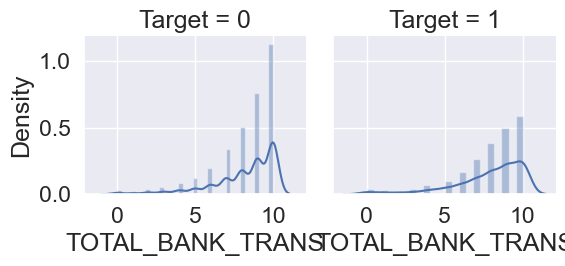

In [ ]:
# Explore TOTAL_BANK_TRANS vs Target with wider spacing
g = sns.FacetGrid(merged_df, col='Target', col_wrap=2)  # Set col_wrap to control the number of columns
g = g.map(sns.distplot, "TOTAL_BANK_TRANS")

# Show the plot
plt.show()


In [ ]:
# dropping the columns
merged_df.drop(['SUBSCRIPTION_PERIOD'], axis=1, inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9523 entries, 0720325859 to 0722476935
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  9523 non-null   object 
 1   TRANSACTION_PERIOD      9523 non-null   object 
 2   TOPUP_CONSUMPTION       9523 non-null   object 
 3   TOPUP_CONSUMPTION_6     9523 non-null   object 
 4   ACTIVE_STATUS           9523 non-null   object 
 5   TRANSACTIONS_RECIEVED   9523 non-null   object 
 6   ACCOUNT_DEBIT           9523 non-null   object 
 7   ACCOUNT_CREDIT          9523 non-null   object 
 8   NUMBER_OF_PAYMENT_TRXN  9523 non-null   object 
 9   VALUE_SENT              9523 non-null   object 
 10  HIGHEST_VALUE           9523 non-null   object 
 11  VALUE_RECIEVED          9523 non-null   object 
 12  TRXN_COUNT              9523 non-null   object 
 13  BANK_TRANS              9523 non-null   object 
 14  OTHER_RECEIPTS          9523 n

In [ ]:
# categorical_columns = [
#      'TRANSACTION_PERIOD',
#     'TOPUP_CONSUMPTION', 'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS',
#     'TRANSACTIONS_RECIEVED', 'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT',
#     'NUMBER_OF_PAYMENT_TRXN', 'VALUE_SENT', 'HIGHEST_VALUE',
#     'VALUE_RECIEVED', 'TRXN_COUNT', 'BANK_TRANS', 'OTHER_RECEIPTS',
#     'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS', 'TOTAL_MONEY_IN_3',
#     'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6',
#     'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE', 'CURR_DEVICE_RRP'
# ]

# # Convert the specified columns to the 'category' data type
# merged_df[categorical_columns] = merged_df[categorical_columns].astype('category')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9523 entries, 0720325859 to 0722476935
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  9523 non-null   object 
 1   TRANSACTION_PERIOD      9523 non-null   object 
 2   TOPUP_CONSUMPTION       9523 non-null   object 
 3   TOPUP_CONSUMPTION_6     9523 non-null   object 
 4   ACTIVE_STATUS           9523 non-null   object 
 5   TRANSACTIONS_RECIEVED   9523 non-null   object 
 6   ACCOUNT_DEBIT           9523 non-null   object 
 7   ACCOUNT_CREDIT          9523 non-null   object 
 8   NUMBER_OF_PAYMENT_TRXN  9523 non-null   object 
 9   VALUE_SENT              9523 non-null   object 
 10  HIGHEST_VALUE           9523 non-null   object 
 11  VALUE_RECIEVED          9523 non-null   object 
 12  TRXN_COUNT              9523 non-null   object 
 13  BANK_TRANS              9523 non-null   object 
 14  OTHER_RECEIPTS          9523 n

## Let us do final null check before splitting our data into train and test

In [ ]:
merged_df.isnull().sum()

Gender                    0
TRANSACTION_PERIOD        0
TOPUP_CONSUMPTION         0
TOPUP_CONSUMPTION_6       0
ACTIVE_STATUS             0
TRANSACTIONS_RECIEVED     0
ACCOUNT_DEBIT             0
ACCOUNT_CREDIT            0
NUMBER_OF_PAYMENT_TRXN    0
VALUE_SENT                0
HIGHEST_VALUE             0
VALUE_RECIEVED            0
TRXN_COUNT                0
BANK_TRANS                0
OTHER_RECEIPTS            0
TOTAL_BANK_TRANS          0
TOTAL_PAYMENTS            0
TOTAL_MONEY_IN_3          0
TOTAL_MONEY_OUT_3         0
CURR_POINTS               0
RDM_POINTS_6              0
LOAN_BLACKLIST            0
LOAN_BLACKLIST_DAYS       0
CURR_DEVICE_MAKE          0
CURR_DEVICE_RRP           0
Target                    0
Age                       0
dtype: int64

In [ ]:
# Get the count of missing values (NaN) for each column
missing_values = merged_df.isnull().sum()

# Print the unique values and missing value counts for each column
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    unique_count = len(unique_values)
    missing_count = missing_values[column]
    print(f"Column '{column}':")
    print(f"Unique Values ({unique_count} unique values):")
    print(unique_values)
    print(f"Missing Values Count: {missing_count}")
    print("\n")


Column 'Gender':
Unique Values (2 unique values):
['M' 'F']
Missing Values Count: 0


Column 'TRANSACTION_PERIOD':
Unique Values (11 unique values):
['10' '9' '8' '5' '7' '6' '4' '1' '3' '2' '0']
Missing Values Count: 0


Column 'TOPUP_CONSUMPTION':
Unique Values (11 unique values):
['10' '5' '2' '9' '7' '8' '6' '1' '3' '4' '0']
Missing Values Count: 0


Column 'TOPUP_CONSUMPTION_6':
Unique Values (11 unique values):
['10' '9' '2' '7' '6' '5' '8' '3' '4' '0' '1']
Missing Values Count: 0


Column 'ACTIVE_STATUS':
Unique Values (8 unique values):
['1' '2' '0' '4' '3' '6' '5' '7']
Missing Values Count: 0


Column 'TRANSACTIONS_RECIEVED':
Unique Values (11 unique values):
['10' '6' '5' '8' '4' '3' '7' '9' '2' '0' '1']
Missing Values Count: 0


Column 'ACCOUNT_DEBIT':
Unique Values (11 unique values):
['10' '9' '2' '7' '8' '6' '5' '3' '4' '0' '1']
Missing Values Count: 0


Column 'ACCOUNT_CREDIT':
Unique Values (11 unique values):
['10' '7' '4' '9' '6' '8' '5' '3' '0' '2' '1']
Missing Value

In [ ]:
# List the column names in your dataset
print(merged_df.columns)


Index(['Gender', 'TRANSACTION_PERIOD', 'TOPUP_CONSUMPTION',
       'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED',
       'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'NUMBER_OF_PAYMENT_TRXN',
       'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT',
       'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS',
       'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6',
       'LOAN_BLACKLIST', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE',
       'CURR_DEVICE_RRP', 'Target', 'Age'],
      dtype='object')


## Building our credit scoring model


## Let us split our data into 3, Train, Test and Validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train (70%) and temporary (30%)
train_df, temp_df = train_test_split(merged_df, test_size=0.3, random_state=42)

# Further splitting the temporary data into validation (15%) and test (15%)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Printing the shapes of the resulting datasets
print(f"Train data shape: {train_df.shape}")
print(f"Validation data shape: {validation_df.shape}")
print(f"Test data shape: {test_df.shape}")


Train data shape: (6666, 27)
Validation data shape: (1428, 27)
Test data shape: (1429, 27)


In [ ]:
# List the column names in your dataset
print(train_df.columns)


Index(['Gender', 'TRANSACTION_PERIOD', 'TOPUP_CONSUMPTION',
       'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED',
       'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'NUMBER_OF_PAYMENT_TRXN',
       'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT',
       'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS',
       'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6',
       'LOAN_BLACKLIST', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE',
       'CURR_DEVICE_RRP', 'Target', 'Age'],
      dtype='object')


In [ ]:
# List the column names in your dataset
print(validation_df.columns)


Index(['Gender', 'TRANSACTION_PERIOD', 'TOPUP_CONSUMPTION',
       'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED',
       'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'NUMBER_OF_PAYMENT_TRXN',
       'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT',
       'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS',
       'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6',
       'LOAN_BLACKLIST', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE',
       'CURR_DEVICE_RRP', 'Target', 'Age'],
      dtype='object')


In [ ]:
# List the column names in your dataset
print(test_df.columns)


Index(['Gender', 'TRANSACTION_PERIOD', 'TOPUP_CONSUMPTION',
       'TOPUP_CONSUMPTION_6', 'ACTIVE_STATUS', 'TRANSACTIONS_RECIEVED',
       'ACCOUNT_DEBIT', 'ACCOUNT_CREDIT', 'NUMBER_OF_PAYMENT_TRXN',
       'VALUE_SENT', 'HIGHEST_VALUE', 'VALUE_RECIEVED', 'TRXN_COUNT',
       'BANK_TRANS', 'OTHER_RECEIPTS', 'TOTAL_BANK_TRANS', 'TOTAL_PAYMENTS',
       'TOTAL_MONEY_IN_3', 'TOTAL_MONEY_OUT_3', 'CURR_POINTS', 'RDM_POINTS_6',
       'LOAN_BLACKLIST', 'LOAN_BLACKLIST_DAYS', 'CURR_DEVICE_MAKE',
       'CURR_DEVICE_RRP', 'Target', 'Age'],
      dtype='object')


## Let me do one hot ENCODING FOR THE CATEGORICAL COLUMNS

In [ ]:
# import pandas as pd

# # Assuming merged_df is your DataFrame
# # Create an empty DataFrame to store the one-hot encoded columns
# merged_df_encoded = pd.DataFrame()

# # Loop through each column in your DataFrame and one-hot encode it
# for column in merged_df.columns:
#     if merged_df[column].dtype == 'object':
#         one_hot = pd.get_dummies(merged_df[column], prefix=column)
#         merged_df_encoded = pd.concat([merged_df_encoded, one_hot], axis=1)
#     else:
#         merged_df_encoded = pd.concat([merged_df_encoded, merged_df[column]], axis=1)

# # Now, merged_df_encoded contains all columns one-hot encoded


In [ ]:
columns_to_encode = ['Gender', 'LOAN_BLACKLIST']



In [ ]:
# Assuming you have 'train_df', 'validation_df', and 'test_df'
train_df = pd.get_dummies(train_df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)
validation_df = pd.get_dummies(validation_df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)
test_df = pd.get_dummies(test_df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6666 entries, 0792365624 to 0701834604
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRANSACTION_PERIOD      6666 non-null   object 
 1   TOPUP_CONSUMPTION       6666 non-null   object 
 2   TOPUP_CONSUMPTION_6     6666 non-null   object 
 3   ACTIVE_STATUS           6666 non-null   object 
 4   TRANSACTIONS_RECIEVED   6666 non-null   object 
 5   ACCOUNT_DEBIT           6666 non-null   object 
 6   ACCOUNT_CREDIT          6666 non-null   object 
 7   NUMBER_OF_PAYMENT_TRXN  6666 non-null   object 
 8   VALUE_SENT              6666 non-null   object 
 9   HIGHEST_VALUE           6666 non-null   object 
 10  VALUE_RECIEVED          6666 non-null   object 
 11  TRXN_COUNT              6666 non-null   object 
 12  BANK_TRANS              6666 non-null   object 
 13  OTHER_RECEIPTS          6666 non-null   object 
 14  TOTAL_BANK_TRANS        6666 n

In [ ]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 0704738101 to 0795167158
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRANSACTION_PERIOD      1428 non-null   object 
 1   TOPUP_CONSUMPTION       1428 non-null   object 
 2   TOPUP_CONSUMPTION_6     1428 non-null   object 
 3   ACTIVE_STATUS           1428 non-null   object 
 4   TRANSACTIONS_RECIEVED   1428 non-null   object 
 5   ACCOUNT_DEBIT           1428 non-null   object 
 6   ACCOUNT_CREDIT          1428 non-null   object 
 7   NUMBER_OF_PAYMENT_TRXN  1428 non-null   object 
 8   VALUE_SENT              1428 non-null   object 
 9   HIGHEST_VALUE           1428 non-null   object 
 10  VALUE_RECIEVED          1428 non-null   object 
 11  TRXN_COUNT              1428 non-null   object 
 12  BANK_TRANS              1428 non-null   object 
 13  OTHER_RECEIPTS          1428 non-null   object 
 14  TOTAL_BANK_TRANS        1428 n

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1429 entries, 0768784324 to 0715807900
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRANSACTION_PERIOD      1429 non-null   object 
 1   TOPUP_CONSUMPTION       1429 non-null   object 
 2   TOPUP_CONSUMPTION_6     1429 non-null   object 
 3   ACTIVE_STATUS           1429 non-null   object 
 4   TRANSACTIONS_RECIEVED   1429 non-null   object 
 5   ACCOUNT_DEBIT           1429 non-null   object 
 6   ACCOUNT_CREDIT          1429 non-null   object 
 7   NUMBER_OF_PAYMENT_TRXN  1429 non-null   object 
 8   VALUE_SENT              1429 non-null   object 
 9   HIGHEST_VALUE           1429 non-null   object 
 10  VALUE_RECIEVED          1429 non-null   object 
 11  TRXN_COUNT              1429 non-null   object 
 12  BANK_TRANS              1429 non-null   object 
 13  OTHER_RECEIPTS          1429 non-null   object 
 14  TOTAL_BANK_TRANS        1429 n

In [ ]:
# Handle missing values in the 'Gender' column using proportions as previously shown
# ...

# Check for missing values
missing_values_train = train_df.isnull().sum().sum()
missing_values_validation = validation_df.isnull().sum().sum()
missing_values_test = test_df.isnull().sum().sum()
print(f"Missing values in train: {missing_values_train}")
print(f"Missing values in validation: {missing_values_validation}")
print(f"Missing values in test: {missing_values_test}")


Missing values in train: 0
Missing values in validation: 0
Missing values in test: 0


In [ ]:
# # Split features and target for training set
# X_train = train_df.drop(columns=['Target'])
# y_train = train_df['Target']

# # Split features and target for validation set
# X_validation = validation_df.drop(columns=['Target'])
# y_validation = validation_df['Target']


In [ ]:
# Drop the 'Target' feature from the input data if it's included
if 'Target' in train_df:
    train_df = train_df.drop(columns=['Target'])


In [ ]:
# Drop the 'Target' feature from the input data if it's included
if 'Target' in validation_df:
    validation_df = validation_df.drop(columns=['Target'])


In [ ]:
if 'Target' in test_df:
    test_df = test_df.drop(columns=['Target'])

In [ ]:
import joblib

# # Load the model from the file
# loaded_model = joblib.load('tuned_random_forest.pkl')



In [ ]:
# Load the model
loaded_model = joblib.load('tuned_random_forest.pkl')

# Load the 'msisdn' column
msisdn_column = pd.read_csv('Msisdn.csv')

# Reassign 'msisdn' column to the DataFrame if needed
# Assuming the DataFrame without 'msisdn' column is X_test
# X_test_with_msisdn = pd.concat([X_test.reset_index(drop=True), msisdn_column], axis=1)


In [ ]:
import pandas as pd

# Assuming you have binary predictions for train, validation, and test datasets
# You can create a DataFrame with all data rows and their respective predicted values

# Example binary predictions (replace with your actual binary predictions)
train_predictions = loaded_model.predict(train_df)
validation_predictions = loaded_model.predict(validation_df)
test_predictions = loaded_model.predict(test_df)

# Example probabilities (replace with your actual probabilities)
train_probabilities = loaded_model.predict_proba(train_df)[:, 1]
validation_probabilities = loaded_model.predict_proba(validation_df)[:, 1]
test_probabilities = loaded_model.predict_proba(test_df)[:, 1]

# Create DataFrames for train, validation, and test datasets
train_df = pd.DataFrame({'Index': range(len(train_predictions)), 'Predicted_Target': train_predictions, 'Probability_of_Defaults': train_probabilities})
validation_df = pd.DataFrame({'Index': range(len(train_predictions), len(train_predictions) + len(validation_predictions)), 'Predicted_Target': validation_predictions, 'Probability_of_Defaults': validation_probabilities})
test_df = pd.DataFrame({'Index': range(len(train_predictions) + len(validation_predictions), len(train_predictions) + len(validation_predictions) + len(test_predictions)), 'Predicted_Target': test_predictions, 'Probability_of_Defaults': test_probabilities})

# Combine them into one DataFrame
all_predictions_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)

# Now, you have a DataFrame 'all_predictions_df' with all data rows, their respective binary predictions, and probability of defaulting.
# It includes the 'Index', 'Predicted_Target', and 'Probability_of_Defaults' columns.

# Define your score calculation logic here
def calculate_score(probability):
    # For example, you can convert the probability to a score between 0 and 100
    # Adjust this logic based on your specific requirements
    return int(probability * 100)

# Apply the score calculation to each row
all_predictions_df['Score'] = all_predictions_df['Probability_of_Defaults'].apply(calculate_score)


In [2]:
# all_predictions_df

In [ ]:
# Join 'Msisdn' column to the predictions DataFrame using index
predictions_df = pd.concat([msisdn_column, all_predictions_df], axis=1)


In [3]:
# predictions_df

In [ ]:
# Assuming 'predictions_df' contains the DataFrame with predictions, probabilities, scores, and Msisdn information

# Adding 254 to every value in the 'Msisdn' column and formatting it as '+254' followed by the updated value
predictions_df['Msisdn'] = '+254' + (predictions_df['Msisdn'] + 254).astype(str)

# Now, the 'Msisdn' column in 'predictions_df' will have the values formatted as '+254' followed by the updated Msisdn numbers
# Drop Index Column
predictions_df = predictions_df.drop(columns=['Index'], errors='ignore')


In [1]:
# predictions_df